In [2]:


import os
import sys
# This script sets up the Python path for a Jupyter notebook environment.
# It ensures that the project root directory is included in the Python path
# so that modules can be imported correctly.
notebook_dir = os.path.dirname(os.path.abspath('__file__'))

# Construct the path to the project root (one level up from 'notebooks' folder)
project_root = os.path.join(notebook_dir, '..')

# Add the project root to sys.path
sys.path.append(project_root)

# Import Libraries

In [ ]:
# notebooks 01_EDA_01.ipynb
# -*- coding: utf-8 -*-
"""
This script performs exploratory data analysis (EDA) on a dataset of tweets.
# It includes loading the dataset, cleaning the text, visualizing tweet counts by language,
# and analyzing the most common words in the tweets.
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import os # Import os for path joining
import string
import nltk # import nltk for text processing

In [4]:
# Import functions/constants from src folder.
from src.data_loader import load_news_data, load_all_stock_data
from src.config import N_TOP_PUBLISHERS, EDA_OUTPUT_DIR, STOCK_TICKERS

Project structure setup complete and config.py created/updated.
Base Directory: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction
News Raw Path: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\raw_analyst_ratings.csv
Stock Data Directory: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data
Tickers to process: ['AAPL', 'AMZN', 'GOOG', 'META', 'NVDA', 'TSLA']


In [5]:
# Set display options for pandas
pd.set_option('display.max_columns', None) # Show all columns in DataFrame
pd.set_option('display.width', 1000) # Set display width for DataFrame output

# Load Data 

In [6]:
# --- Data Loading ---
print("--- Loading Data ---")
news_df = load_news_data()
all_stock_dfs = load_all_stock_data()


--- Loading Data ---
Successfully loaded news data from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\raw_analyst_ratings.csv
News data shape: (1407328, 6)
Successfully loaded stock data for AAPL from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AAPL_historical_data.csv
  Shape: (10998, 8)
Successfully loaded stock data for AMZN from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\AMZN_historical_data.csv
  Shape: (6846, 8)
Successfully loaded stock data for GOOG from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\GOOG_historical_data.csv
  Shape: (5020, 8)
Successfully loaded stock data for META from: c:\Users\hp\OneDrive\Desktop\kaim-ai\KAIM-1\NewsSentiment-StockPrice-Prediction\data\yfinance_data\META_historical_data.csv
  Shape: (2926, 8)
Successfully loaded stock data for NVDA from: c

#  EDA for News Data 

In [7]:
if news_df is None:
    print("Cannot proceed with News EDA as data loading failed.")
else:
    print("\n--- News Data Loading Complete ---")
    print("\nNews DataFrame Info:")
    news_df.info()


--- News Data Loading Complete ---

News DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


 ## 1. Descriptive Statistics for Textual Lengths (Headline)

In [8]:

print("\n## 1. Descriptive Statistics (Headline Length)")
print("Calculating headline lengths in characters and words...")

news_df['headline_length_chars'] = news_df['headline'].apply(len)
news_df['headline_length_words'] = news_df['headline'].apply(lambda x: len(str(x).split())) # Ensure string conversion

# Display the first few rows of the DataFrame with new columns
print("\n### Headline Length (Characters) Statistics:")
print(news_df['headline_length_chars'].describe())
print("\n### Headline Length (Words) Statistics:")
print(news_df['headline_length_words'].describe())


## 1. Descriptive Statistics (Headline Length)
Calculating headline lengths in characters and words...

### Headline Length (Characters) Statistics:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length_chars, dtype: float64

### Headline Length (Words) Statistics:
count    1.407328e+06
mean     1.141671e+01
std      6.352997e+00
min      1.000000e+00
25%      7.000000e+00
50%      1.000000e+01
75%      1.300000e+01
max      7.700000e+01
Name: headline_length_words, dtype: float64


**Visualizing Distribution**


Visualizing Headline Length Distribution in characters..

Visualizing Headline Length Distribution in Words...


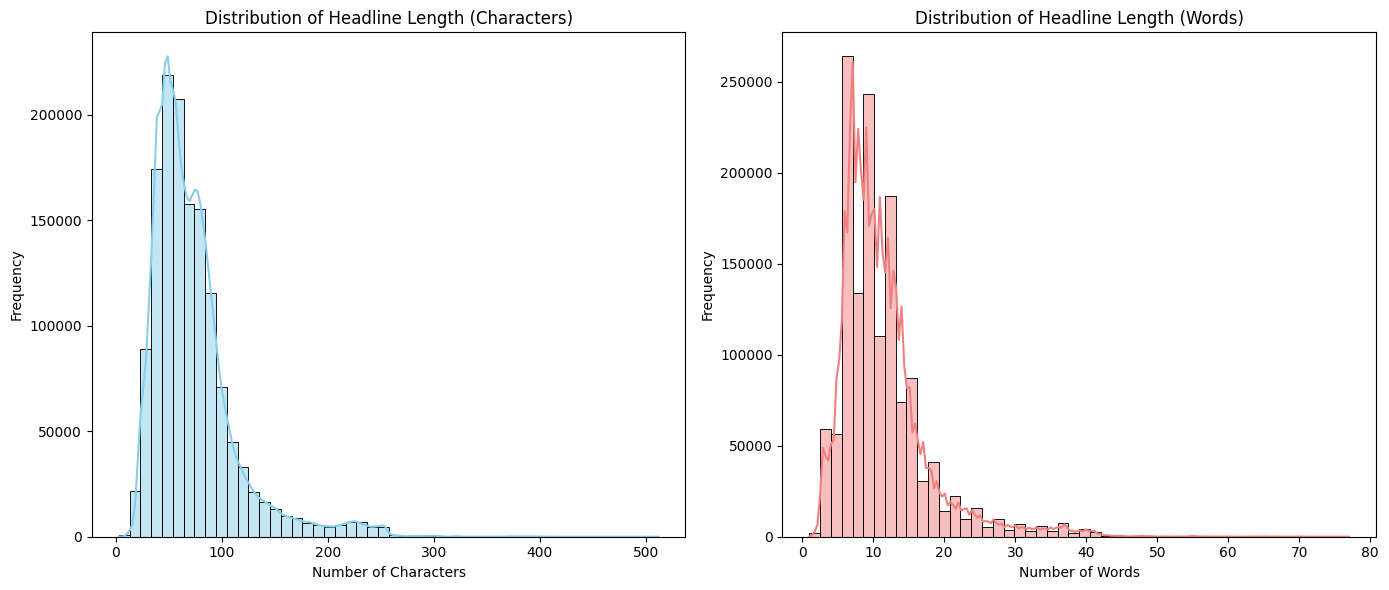

Saved: headline_length_distribution.png


In [9]:
print("\nVisualizing Headline Length Distribution in characters..")
plt.figure(figsize=(14, 6)) # Adjusted figure size for better side-by-side view
plt.subplot(1, 2, 1)
sns.histplot(news_df['headline_length_chars'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Headline Length (Characters)')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Visualize the distribution of headline lengths in words
print("\nVisualizing Headline Length Distribution in Words...")
plt.subplot(1, 2, 2)
sns.histplot(news_df['headline_length_words'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Headline Length (Words)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.tight_layout()
# Save the plot to the EDA_OUTPUT_DIR
# Ensure EDA_OUTPUT_DIR exists
os.makedirs(EDA_OUTPUT_DIR, exist_ok=True)
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'headline_length_distribution.png'))
plt.show()
print("Saved: headline_length_distribution.png")

# 2. Publisher Analysis


## 2. Publisher Analysis (Top 20 Publishers)

### Top Publishers by Article Count:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

Visualizing Top 20 Publishers...


C:\Users\hp\AppData\Local\Temp\ipykernel_11240\651332027.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.head(N_TOP_PUBLISHERS).values,


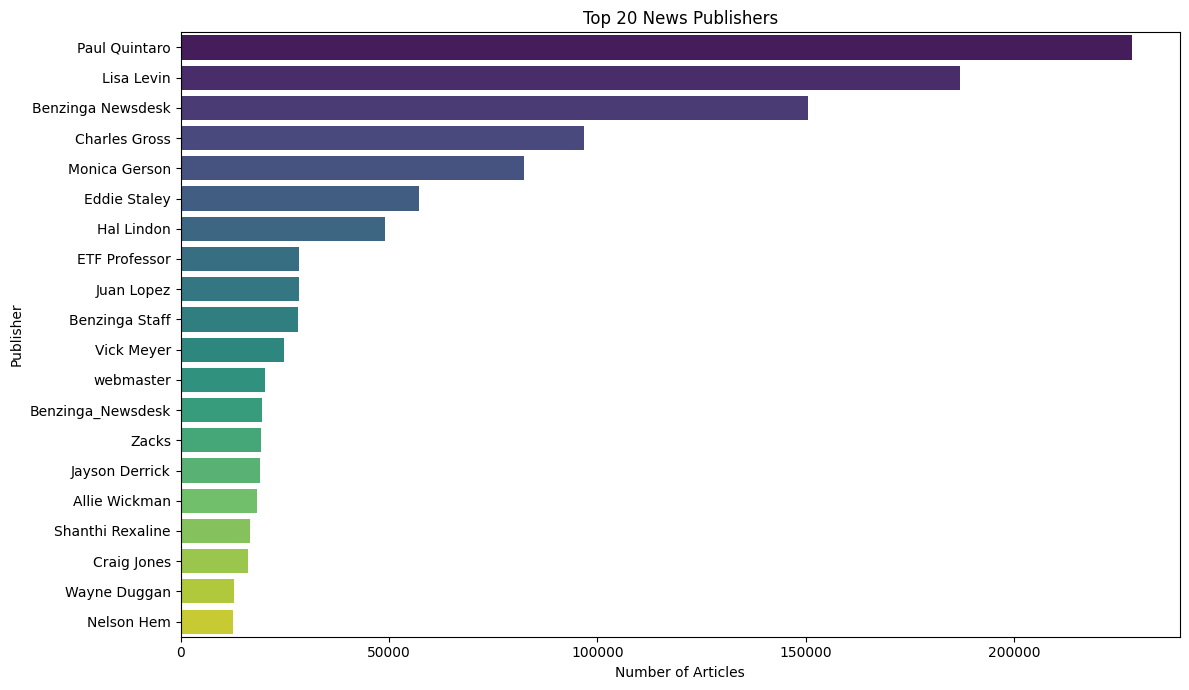

Saved: top_publishers.png

Attempting to extract domains from publisher names if they appear as email-like strings...


In [10]:

print(f"\n## 2. Publisher Analysis (Top {N_TOP_PUBLISHERS} Publishers)")
publisher_counts = news_df['publisher'].value_counts()
print("\n### Top Publishers by Article Count:")
print(publisher_counts.head(N_TOP_PUBLISHERS))

# Visualize the top N publishers
print(f"\nVisualizing Top {N_TOP_PUBLISHERS} Publishers...")
plt.figure(figsize=(12, 7))
sns.barplot(x=publisher_counts.head(N_TOP_PUBLISHERS).values,
                y=publisher_counts.head(N_TOP_PUBLISHERS).index,
                palette='viridis')
# Set the title and labels
plt.title(f'Top {N_TOP_PUBLISHERS} News Publishers')
plt.xlabel('Number of Articles')
plt.ylabel('Publisher')
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'top_publishers.png'))
plt.show()
print("Saved: top_publishers.png")
print("\nAttempting to extract domains from publisher names if they appear as email-like strings...")
def extract_domain(publisher_name):
        match = re.search(r'@([a-zA-Z0-9.-]+\.[a-zA-Z]{2,})', str(publisher_name))
        return match.group(1) if match else publisher_name # Return original if no domain found


### Top Publisher Domains by Article Count:
publisher_domain
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: count, dtype: int64

Visualizing Top 20 News Publisher Domains...


C:\Users\hp\AppData\Local\Temp\ipykernel_11240\4047460372.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=domain_counts.head(N_TOP_PUBLISHERS).values,


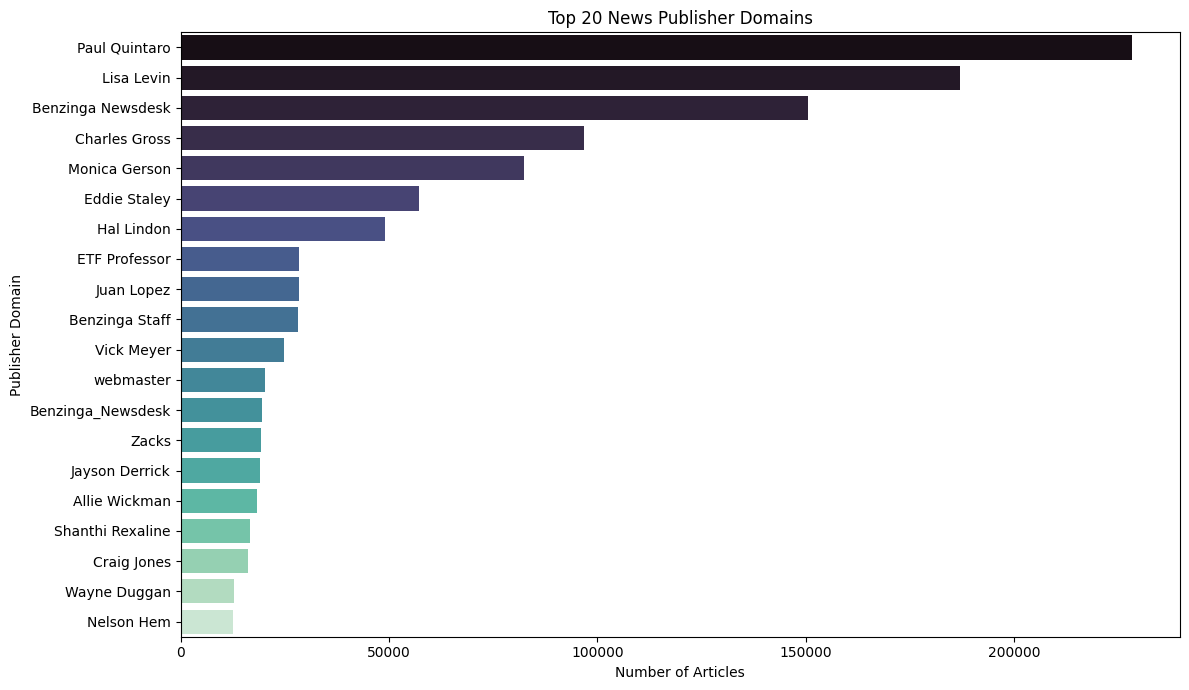

Saved: top_publisher_domains.png


In [11]:
# -*- coding: utf-8 -*-
# Check if 'publisher' column contains email-like addresses
if news_df['publisher'].astype(str).str.contains('@').any():
        news_df['publisher_domain'] = news_df['publisher'].apply(extract_domain)
        domain_counts = news_df['publisher_domain'].value_counts()
        print("\n### Top Publisher Domains by Article Count:")
        print(domain_counts.head(N_TOP_PUBLISHERS))

        print(f"\nVisualizing Top {N_TOP_PUBLISHERS} News Publisher Domains...")
        plt.figure(figsize=(12, 7))
        sns.barplot(x=domain_counts.head(N_TOP_PUBLISHERS).values,
                    y=domain_counts.head(N_TOP_PUBLISHERS).index,
                    palette='mako') # Changed palette for variety
        plt.title(f'Top {N_TOP_PUBLISHERS} News Publisher Domains')
        plt.xlabel('Number of Articles')
        plt.ylabel('Publisher Domain')
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'top_publisher_domains.png'))
        plt.show()
        print("Saved: top_publisher_domains.png")
else:
        print("No email-like addresses found in 'publisher' column, skipping domain extraction.")

# 3. Time Series Analysis


## 3. Time Series Analysis (News Data)
Converting 'date' column to datetime objects and analyzing news frequency...

### Daily News Publication Frequency:
2011-04-27 00:00:00-04:00    1
2011-04-28 00:00:00-04:00    2
2011-04-29 00:00:00-04:00    2
2011-04-30 00:00:00-04:00    1
2011-05-01 00:00:00-04:00    1
Freq: D, dtype: int64


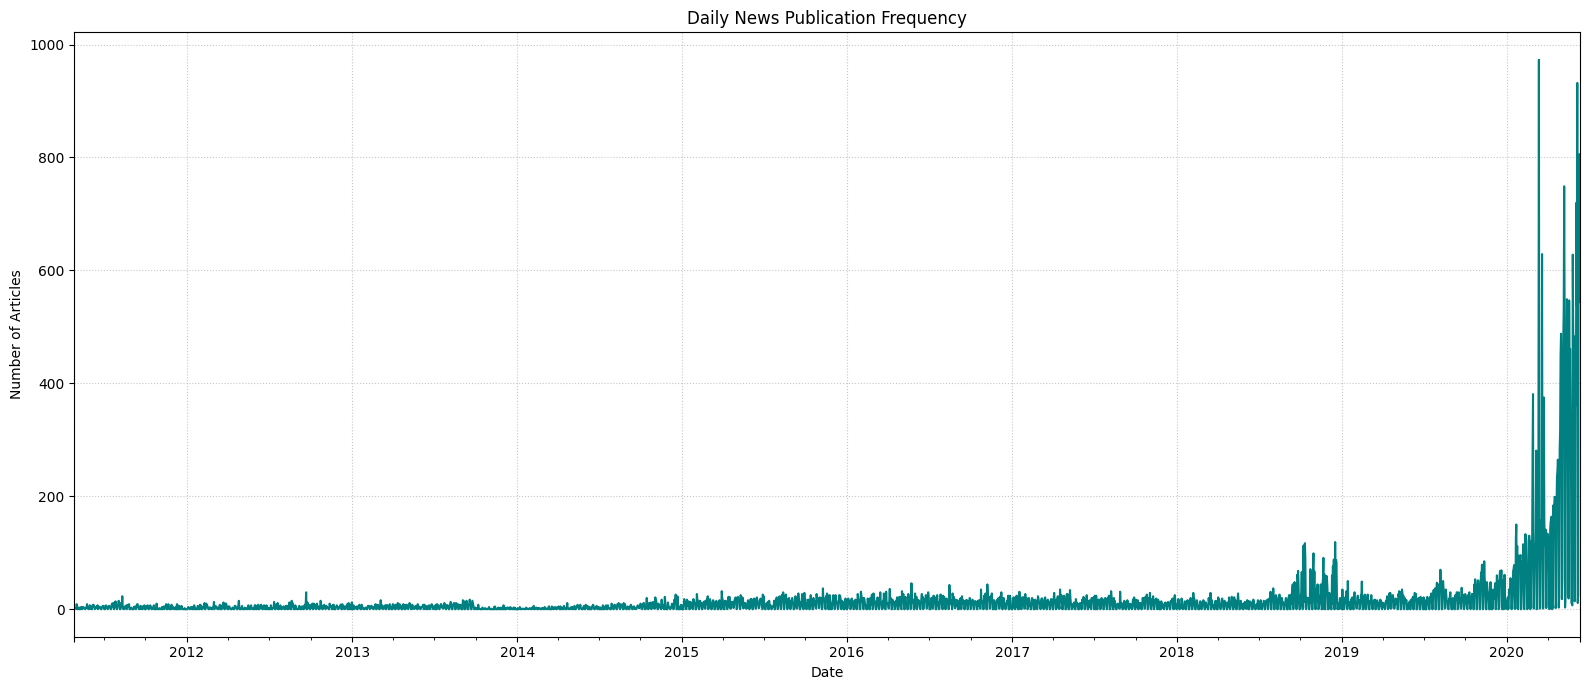

Saved: daily_news_frequency.png


In [12]:

print("\n## 3. Time Series Analysis (News Data)")
print("Converting 'date' column to datetime objects and analyzing news frequency...")
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce')
news_df.dropna(subset=['date'], inplace=True) # Remove rows where date conversion failed

print("\n### Daily News Publication Frequency:")
daily_news_counts = news_df.set_index('date').resample('D').size()
    # Fill missing dates with 0 for a continuous plot
daily_news_counts = daily_news_counts.reindex(pd.date_range(start=daily_news_counts.index.min(),
                                                                end=daily_news_counts.index.max(),
                                                                freq='D'), fill_value=0)
print(daily_news_counts.head())

plt.figure(figsize=(16, 7)) # Increased figure size
daily_news_counts.plot(title='Daily News Publication Frequency', color='teal', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True, linestyle=':', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'daily_news_frequency.png'))
plt.show()
print("Saved: daily_news_frequency.png")



### News Publication Frequency by Hour of Day:
hour_of_day
0       67
1       14
2       57
3       93
4     1469
5     1829
6     2476
7     5033
8     5527
9     5965
10    7669
11    5701
12    5732
13    2710
14    2075
15    1612
16    3939
17    2800
18     704
19     227
20     131
21      82
22      48
23      27
Name: count, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_7040\1508497259.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_news_counts.index, y=hourly_news_counts.values, palette='plasma')


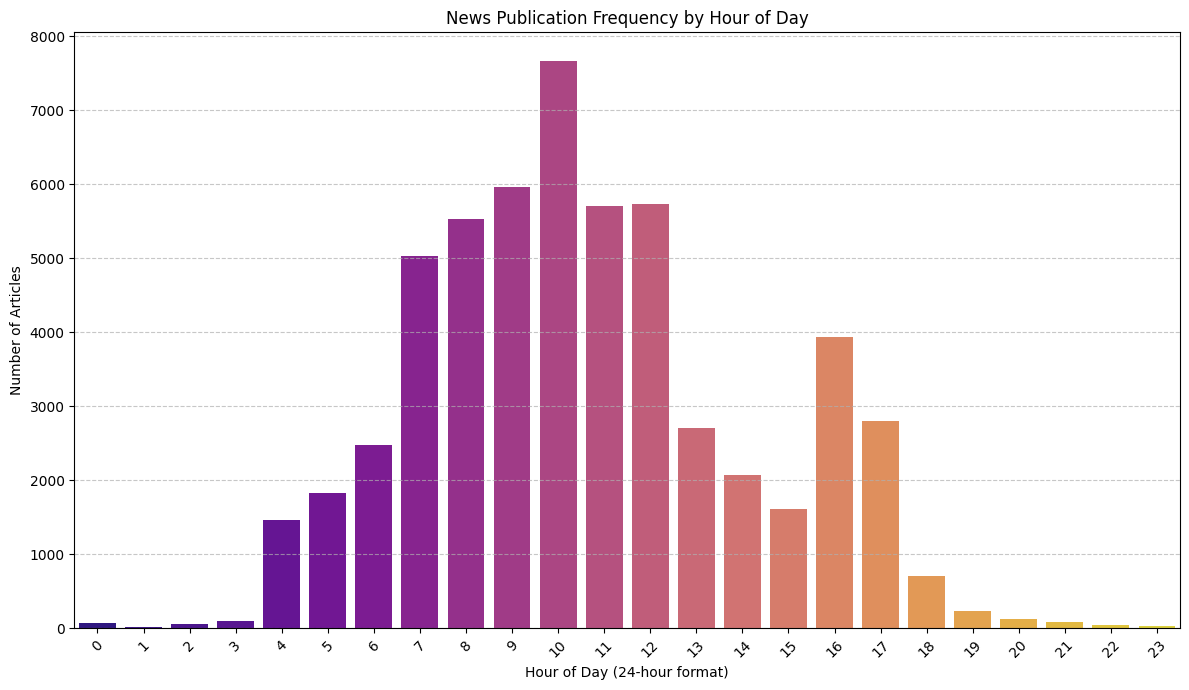

In [23]:
# -*- coding: utf-8 -*-
# Check if 'publisher' column contains email-like addresses
print("\n### News Publication Frequency by Hour of Day:")
news_df['hour_of_day'] = news_df['date'].dt.hour
hourly_news_counts = news_df['hour_of_day'].value_counts().sort_index()
print(hourly_news_counts)
# -*- coding: utf-8 -*-
# Visualize the hourly news publication frequency
plt.figure(figsize=(12, 7)) # Increased figure size
sns.barplot(x=hourly_news_counts.index, y=hourly_news_counts.values, palette='plasma')
plt.title('News Publication Frequency by Hour of Day') # <-- Separate this line
plt.xlabel('Hour of Day (24-hour format)') # <-- And put xlabel on its own line
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(os.path.join(EDA_OUTPUT_DIR, 'hourly_news_frequency.png'))
plt.show()

# 4. Text Analysis

In [13]:
import nltk
print("Attempting to download NLTK 'stopwords'...")
nltk.download('stopwords')
print("Attempting to download NLTK 'punkt'...")
nltk.download('punkt')
print("NLTK data download attempt complete.")

Attempting to download NLTK 'stopwords'...
Attempting to download NLTK 'punkt'...
NLTK data download attempt complete.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
print("\n## 4. Text Analysis (Common Keywords)")
print("Performing basic text preprocessing and identifying common unigrams, bigrams, and trigrams...")

    # NLTK data download check (now less critical as we downloaded it manually)
try:
        from nltk.corpus import stopwords
        from nltk.tokenize import word_tokenize
        from nltk.util import ngrams
        # No need for manual download attempts here if we already confirmed manual download
        _ = nltk.data.find('corpora/stopwords')
        _ = nltk.data.find('tokenizers/punkt')
except Exception as e:
        print(f"Error: NLTK resources not found despite previous steps. Please ensure 'stopwords' and 'punkt' are downloaded.")
        print("You can try running this in a separate cell: `import nltk; nltk.download('stopwords'); nltk.download('punkt')`")
        sys.exit("Exiting EDA due to missing NLTK data.") # Exit if critical data is missing

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


## 4. Text Analysis (Common Keywords)
Performing basic text preprocessing and identifying common unigrams, bigrams, and trigrams...


NameError: name 'string' is not defined

In [ ]:

def preprocess_text_for_eda(text):
        text = str(text).lower()
        # Remove URLs (if any exist in headlines)
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        text = ''.join(char for char in text if char not in punctuation)
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
        return tokens

    # Ensure 'headline' column is string type before applying preprocess_text_for_eda
news_df['processed_headline'] = news_df['headline'].astype(str).apply(preprocess_text_for_eda)

    # Get all words for unigram analysis
all_words = [word for tokens in news_df['processed_headline'] for word in tokens]
word_freq = Counter(all_words)
print("\n### Top 20 Most Common Words (Unigrams):")
for word, count in word_freq.most_common(20):
        print(f"- {word}: {count}")

    # Get bigrams
all_bigrams = []
for tokens in news_df['processed_headline']:
        all_bigrams.extend(list(ngrams(tokens, 2))) # ngrams(tokens, 3) for trigrams

bigram_freq = Counter(all_bigrams)
print("\n### Top 20 Most Common Bigrams:")
for bigram, count in bigram_freq.most_common(20):
        print(f"- {' '.join(bigram)}: {count}")

    # Get trigrams
all_trigrams = []
for tokens in news_df['processed_headline']:
        all_trigrams.extend(list(ngrams(tokens, 3)))
trigram_freq = Counter(all_trigrams)
print("\n### Top 20 Most Common Trigrams:")
for trigram, count in trigram_freq.most_common(20):
        print(f"- {' '.join(trigram)}: {count}")

else:
    print("News data not loaded. Skipping news data analysis.")

# EDA for Stock data

In [ ]:

print("\n--- Stock Data Analysis for All Tickers ---")
if all_stock_dfs:
    for ticker, stock_df in all_stock_dfs.items():
        print(f"\n## Analyzing {ticker} Stock Data")
        print(f"### {ticker} Data Descriptive Statistics:")
        print(stock_df.describe())

        ### Plot Historical Closing Price
        print(f"\nPlotting {ticker} Historical Closing Price...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Close'].plot(title=f'{ticker} Historical Closing Price', color='purple', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Closing Price')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_closing_price.png'))
        plt.show()
        print(f"Saved: {ticker}_closing_price.png")

        ### Plot Daily Volume
        print(f"\nPlotting {ticker} Daily Trading Volume...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Volume'].plot(title=f'{ticker} Daily Trading Volume', color='orange', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Volume')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_trading_volume.png'))
        plt.show()
        print(f"Saved: {ticker}_trading_volume.png")

        ### Calculate and Plot Daily Returns
        stock_df['Daily_Return'] = stock_df['Adj Close'].pct_change()
        print(f"\n### {ticker} Daily Returns Statistics:")
        print(stock_df['Daily_Return'].describe())

        print(f"\nPlotting {ticker} Daily Returns...")
        plt.figure(figsize=(16, 7)) # Increased figure size
        stock_df['Daily_Return'].plot(title=f'{ticker} Daily Returns', color='green', linewidth=1)
        plt.xlabel('Date')
        plt.ylabel('Daily Return')
        plt.grid(True, linestyle=':', alpha=0.7)
        plt.tight_layout()
        plt.savefig(os.path.join(EDA_OUTPUT_DIR, f'{ticker}_daily_returns.png'))
        plt.show()
        print(f"Saved: {ticker}_daily_returns.png")
else:
    print("No stock data was loaded. Skipping stock data analysis.")

print("\n--- All EDA tasks complete! ---")